In [1]:
#install nba_api
pip install nba_api

Note: you may need to restart the kernel to use updated packages.


In [4]:
from nba_api.stats.endpoints import LeagueStandings
import pandas as pd

# choose years to pull from
years = range(2000, 2023)

# create empty list to keep standings
standings_list = []

# loop through each year for API request
for year in years:
    season = f"{year}-{str(year+1)[-2:]}"
    standings = LeagueStandings(season=season, season_type='Regular Season').get_data_frames()[0]
    standings_list.append(standings)

# concatenate the standings for all years into a single dataframe
all_standings = pd.concat(standings_list, ignore_index=True)

In [5]:
#display maximum columns to determine which ones you want to keep
pd.set_option('display.max_columns', None)
all_standings

,LeagueID,SeasonID,TeamID,TeamCity,TeamName,Conference,ConferenceRecord,PlayoffRank,ClinchIndicator,Division,DivisionRecord,DivisionRank,WINS,LOSSES,WinPCT,LeagueRank,Record,HOME,ROAD,L10,Last10Home,Last10Road,OT,ThreePTSOrLess,TenPTSOrMore,LongHomeStreak,strLongHomeStreak,LongRoadStreak,strLongRoadStreak,LongWinStreak,LongLossStreak,CurrentHomeStreak,strCurrentHomeStreak,CurrentRoadStreak,strCurrentRoadStreak,CurrentStreak,strCurrentStreak,ConferenceGamesBack,DivisionGamesBack,ClinchedConferenceTitle,ClinchedDivisionTitle,ClinchedPlayoffBirth,EliminatedConference,EliminatedDivision,AheadAtHalf,BehindAtHalf,TiedAtHalf,AheadAtThird,BehindAtThird,TiedAtThird,Score100PTS,OppScore100PTS,OppOver500,LeadInFGPCT,LeadInReb,FewerTurnovers,PointsPG,OppPointsPG,DiffPointsPG,vsEast,vsAtlantic,vsCentral,vsWest,vsPacific,vsMidwest,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,PreAS,PostAS,vsSoutheast,vsNorthwest,vsSouthwest
0,00,22000,1610612755,Philadelphia,76ers,East,40-14,1,,Atlantic,18-6,1,56,26,0.683,None,56-26,29-12,27-14,None,None,None,3-3,6-4,26-12,None,None,None,None,None,None,None,None,None,None,None,None,0.0,0.0,None,None,None,None,None,45-11,10-14,1-1,48-3,7-23,1-0,28-2,7-8,0-0,45-3,40-12,29-8,94.7,90.4,4.3,40-14,18-6,22-8,16-12,8-6,8-6,None,None,None,None,None,None,None,None,None,None,None,None,36-14,20-12,NaN,NaN,NaN
1,00,22000,1610612759,San Antonio,Spurs,West,39-13,1,,Midwest,19-5,1,58,24,0.707,None,58-24,33-8,25-16,None,None,None,2-4,3-7,40-6,None,None,None,None,None,None,None,None,None,None,None,None,0.0,0.0,None,None,None,None,None,46-10,9-12,3-2,50-6,4-16,4-2,24-4,5-14,0-1,53-5,40-11,26-9,96.2,88.4,7.8,19-11,8-6,11-5,39-13,20-8,19-5,None,None,None,None,None,None,None,None,None,None,None,None,31-16,27-8,NaN,NaN,NaN
2,00,22000,1610612747,Los Angeles,Lakers,West,34-18,2,,Pacific,14-10,1,56,26,0.683,None,56-26,31-10,25-16,None,None,None,6-3,10-5,24-13,None,None,None,None,None,None,None,None,None,None,None,None,2.0,0.0,None,None,None,None,None,46-6,9-18,1-2,47-7,7-17,2-2,37-8,20-16,0-0,49-7,40-10,16-10,100.6,97.2,3.4,22-8,10-4,12-4,34-18,14-10,20-8,None,None,None,None,None,None,None,None,None,None,None,None,31-16,25-10,NaN,NaN,NaN
3,00,22000,1610612749,Milwaukee,Bucks,East,38-16,2,,Central,19-9,1,52,30,0.634,None,52-30,31-10,21-20,None,None,None,1-2,3-7,20-12,None,None,None,None,None,None,None,None,None,None,None,None,4.0,0.0,None,None,None,None,None,38-10,12-20,2-0,44-7,8-22,0-1,39-10,10-23,0-0,41-8,29-7,37-17,100.7,96.9,3.8,38-16,19-7,19-9,14-14,7-7,7-7,None,None,None,None,None,None,None,None,None,None,None,None,29-18,23-12,NaN,NaN,NaN
4,00,22000,1610612748,Miami,Heat,East,34-20,3,,Atlantic,15-10,2,50,32,0.610,None,50-32,29-12,21-20,None,None,None,6-2,9-9,18-12,None,None,None,None,None,None,None,None,None,None,None,None,6.0,6.0,None,None,None,None,None,39-9,8-20,3-3,42-5,7-26,1-1,15-2,2-6,0-0,35-4,24-7,35-20,88.9,86.6,2.3,34-20,15-10,19-10,16-12,8-6,8-6,None,None,None,None,None,None,None,None,None,None,None,None,30-20,20-12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,00,22022,1610612747,Los Angeles,Lakers,West,14-20,13,,Pacific,2-9,5,27,32,0.458,0,27-32,14-14,13-18,4-6,4-6,5-5,2-4,6-4,10-17,3,W 3,-6,L 6,5,5,1,W 1,-1,L 1,1,W 1,14.0,6.0,0,0,0,0,0,18-9,8-19,1-4,21-4,5-27,1-1,27-29,25-32,11-27,24-9,19-11,10-11,117.0,118.2,-1.2,13-12,2-6,4-4,14-20,2-9,NaN,9-7,3-4,None,None,None,None,None,None,None,1-5,7-7,7-9,27-32,None,7-2,4-8,8-3
682,00,22022,1610612766,Charlotte,Hornets,East,9-29,14,,Southeast,6-8,5,17,43,0.283,0,17-43,9-18,8-25,3-7,4-6,2-8,1-4,2-2,5-26,-5,L 5,-7,L 7,2,8,2,W 2,-7,L 7,2,W 2,25.5,15.5,0,0,0,0,0,9-7,7-34,1-2,12-5,5-37,0-1,17-35,16-42,11-25,13-5,9-14,7-27,112.5,118.9,-6.4,9-29,1-12,2-9,8-14,3-6,NaN,5-10,2-6,None,

In [6]:
#keeping the columns neccesary for analysis
all_standings= all_standings.loc[:, ['TeamName', 'Record', 'HOME', 'ROAD']]
all_standings

,TeamName,Record,HOME,ROAD
0,76ers,56-26,29-12,27-14
1,Spurs,58-24,33-8,25-16
2,Lakers,56-26,31-10,25-16
3,Bucks,52-30,31-10,21-20
4,Heat,50-32,29-12,21-20
...,...,...,...,...
681,Lakers,27-32,14-14,13-18
682,Hornets,17-43,9-18,8-25
683,Spurs,14-45,9-21,5-24
684,Pistons,15-44,8-21,7-23


In [7]:
# check for missing values
print(all_standings['Record'].isna().sum())
print(all_standings['HOME'].isna().sum())
print(all_standings['ROAD'].isna().sum())

# fill missing values in
all_standings['Record'].fillna('0-0', inplace=True)
all_standings['HOME'].fillna('0-0', inplace=True)
all_standings['ROAD'].fillna('0-0', inplace=True)

# Split the columns
all_standings[['WINS', 'LOSSES']] = all_standings['Record'].str.split('-', expand=True).astype(int)
all_standings[['HOME_WINS', 'HOME_LOSSES']] = all_standings['HOME'].str.split('-', expand=True).astype(int)
all_standings[['ROAD_WINS', 'ROAD_LOSSES']] = all_standings['ROAD'].str.split('-', expand=True).astype(int)
all_standings = all_standings.loc[:, ['TeamName', 'WINS', 'LOSSES', 'HOME_WINS', 'HOME_LOSSES', 'ROAD_WINS', 'ROAD_LOSSES']]
all_standings

0
0
0


,TeamName,WINS,LOSSES,HOME_WINS,HOME_LOSSES,ROAD_WINS,ROAD_LOSSES
0,76ers,56,26,29,12,27,14
1,Spurs,58,24,33,8,25,16
2,Lakers,56,26,31,10,25,16
3,Bucks,52,30,31,10,21,20
4,Heat,50,32,29,12,21,20
...,...,...,...,...,...,...,...
681,Lakers,27,32,14,14,13,18
682,Hornets,17,43,9,18,8,25
683,Spurs,14,45,9,21,5,24
684,Pistons,15,44,8,21,7,23


In [8]:
# calculate winrates for each category
all_standings['WINRATE'] = all_standings['WINS'] / (all_standings['LOSSES'] + all_standings['WINS'])
all_standings['HOME_WINRATE'] = all_standings['HOME_WINS'] / (all_standings['HOME_LOSSES'] + all_standings['HOME_WINS'])
all_standings['ROAD_WINRATE'] = all_standings['ROAD_WINS'] / (all_standings['ROAD_LOSSES'] + all_standings['ROAD_WINS'])

#create a new DataFrame with just the columns you want
winrate_df = all_standings[['TeamName', 'WINRATE', 'HOME_WINRATE', 'ROAD_WINRATE']]

winrate_df


,TeamName,WINRATE,HOME_WINRATE,ROAD_WINRATE
0,76ers,0.682927,0.707317,0.658537
1,Spurs,0.707317,0.804878,0.609756
2,Lakers,0.682927,0.756098,0.609756
3,Bucks,0.634146,0.756098,0.512195
4,Heat,0.609756,0.707317,0.512195
...,...,...,...,...
681,Lakers,0.457627,0.500000,0.419355
682,Hornets,0.283333,0.333333,0.242424
683,Spurs,0.237288,0.300000,0.172414
684,Pistons,0.254237,0.275862,0.233333


In [9]:
import pandas as pd
#group all teamname columns into one, and take the average values of the aggregate row
winrate_df = winrate_df.groupby('TeamName').mean().reset_index()

winrate_df

,TeamName,WINRATE,HOME_WINRATE,ROAD_WINRATE
0,76ers,0.482640,0.559244,0.406424
1,Bobcats,0.359387,0.468219,0.250554
2,Bucks,0.504122,0.603824,0.404304
3,Bulls,0.469415,0.554496,0.384186
4,Cavaliers,0.477835,0.582253,0.373013
5,Celtics,0.565218,0.634955,0.495368
6,Clippers,0.508888,0.601425,0.416365
7,Grizzlies,0.483436,0.583135,0.383315
8,Hawks,0.456614,0.567029,0.346485
9,Heat,0.556525,0.645381,0.468071


In [11]:
import numpy as np
#create the expected winrate at home vs equal oponent and standard deviation of the metric
winrate_df['Expected_Winrate_Home'] = winrate_df['HOME_WINRATE'] / winrate_df['WINRATE'] * 0.5
winrate_df['Expected_Winrate_Home_STDV'] = np.sqrt(winrate_df['HOME_WINRATE'] * (1 - winrate_df['HOME_WINRATE']) / winrate_df['WINRATE']) * 0.5
winrate_df

,TeamName,WINRATE,HOME_WINRATE,ROAD_WINRATE,Expected_Winrate_Home,Expected_Winrate_Home_STDV
0,76ers,0.482640,0.559244,0.406424,0.579360,0.357321
1,Bobcats,0.359387,0.468219,0.250554,0.651414,0.416179
2,Bucks,0.504122,0.603824,0.404304,0.598887,0.344430
3,Bulls,0.469415,0.554496,0.384186,0.590624,0.362716
4,Cavaliers,0.477835,0.582253,0.373013,0.609261,0.356733
5,Celtics,0.565218,0.634955,0.495368,0.561691,0.320189
6,Clippers,0.508888,0.601425,0.416365,0.590920,0.343166
7,Grizzlies,0.483436,0.583135,0.383315,0.603115,0.354554
8,Hawks,0.456614,0.567029,0.346485,0.620906,0.366630
9,Heat,0.556525,0.645381,0.468071,0.579831,0.320639


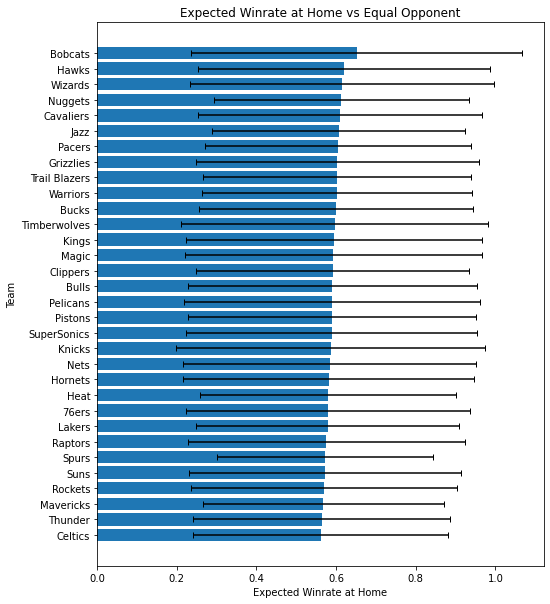

In [12]:
import matplotlib.pyplot as plt

# create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 10))

# sort the dataframe by the expected winrate
winrate_df.sort_values('Expected_Winrate_Home', ascending=False, inplace=True)

# Create the bar chart
ax.barh(winrate_df['TeamName'], winrate_df['Expected_Winrate_Home'], xerr=winrate_df['Expected_Winrate_Home_STDV'], capsize=3)
ax.set_title("Expected Winrate at Home vs Equal Opponent")
ax.set_xlabel("Expected Winrate at Home")
ax.set_ylabel("Team")
plt.gca().invert_yaxis()

plt.show()


